In [110]:
# NEW IRON (12566.768) NEW H (12818.07)

In [184]:
#importing modules
import scipy.optimize as optimize
from scipy.interpolate import griddata
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import glob
import os
%matplotlib inline

In [252]:
rawobsflux = pd.read_excel("Dered_FluxesFinal.xlsx")  # observational data read in
obsflux = rawobsflux[-10:]
rawunc = pd.read_excel("Dered_UncertantiesFinal.xlsx")
obsunc = rawunc[-10:]

obsflux = obsflux.values  # usable values: flux and uncertainty
obsunc = obsunc.values

obsflux = obsflux[:, 2:]  
obsunc = obsunc[:, 2:]

#Deciding whether obsunc is too high...adjusting such that all uncertainties are around 1 percent of the flux at most (more realistic)/
s_n_lim = 50.  #setting the signal to noise ilmit

#printing to check values before 
print(obsunc)
print((obsflux/obsunc) > s_n_lim)

obsunc[(obsflux/obsunc) > s_n_lim] = 1/s_n_lim * obsflux[(obsflux/obsunc) > s_n_lim] #adjusting all uncertainties at once

print(obsunc)
print((obsflux/obsunc) > s_n_lim)

[[5.56181832676928e-16 6.743620483588439e-16 6.385612883275021e-16
  4.4109281422425097e-16 6.27782327969656e-16 6.793691927351792e-16]
 [1.884001628982468e-17 2.2843234406220112e-17 2.1630525068102668e-17
  1.4941508904223202e-17 2.1265400253162592e-17 2.301284563059546e-17]
 [1.8293852038077142e-16 2.21810185230149e-16 2.1003465125213595e-16
  1.4508360763313068e-16 2.064892512709525e-16 2.2345712788401267e-16]
 [7.164174310736623e-17 8.686452845349423e-17 8.225303504877583e-17
  5.681713466091408e-17 8.08645979162565e-17 8.750949837166717e-17]
 [4.355182364915235e-18 5.280592655183982e-18 5.000254770020387e-18
  3.453977697463148e-18 4.9158501107803216e-18 5.3198011039415434e-18]
 [3.541905455202582e-18 4.29450671980365e-18 4.066518497597433e-18
  2.808989710131434e-18 3.997875373622826e-18 4.3263934714729204e-18]
 [3.66775208516948e-18 4.4470938526034944e-18 4.21100503319058e-18
  2.908795278942563e-18 4.1399229661295854e-18 4.480113565129265e-18]]
[[False False False  True False F

In [253]:
obsSi = obsflux[:1]  
obsFe26 = obsflux[1:2]
obsS = obsflux[2:3]
#obsFe179 = obsflux[3:4]
obsNe = obsflux[3:4]
obsFe16 = obsflux[4:5]

print(obsSi)
print(obsFe26)
print(obsS)
#print(obsFe179)
print(obsNe)
print(obsFe16)

[[2.576638862043768e-15 8.751194548512549e-15 1.2397610630682168e-14
  2.447007992345579e-14 2.7219746210545716e-15 0.0]]
[[1.5399593107560003e-15 7.666824554227578e-15 2.8197857191055756e-14
  5.3133042998665864e-14 2.075576823966618e-15 0.0]]
[[-1.0997414382563047e-15 1.491383083532915e-15 8.752224919300781e-16
  -6.075188926041783e-16 -1.1841439116903085e-15 0.0]]
[[-9.83157369394318e-16 2.071006309359975e-15 -5.751144350109273e-16
  1.0066527153418673e-15 3.3883778928910404e-15 -1.6469665482391509e-15]]
[[4.5298326670088706e-15 3.951972914090977e-15 2.45209735736691e-15
  1.6508277669521212e-15 7.350935807129337e-15 1.0427991323570897e-14]]


In [254]:
runcSi = obsunc[:1]  
runcFe26 = obsunc[1:2]
runcS = obsunc[2:3]
#runcFe179 = obsunc[3:4]
runcNe = obsunc[3:4]
runcFe16 = obsunc[4:5]

print(runcSi)
print(runcFe26)
print(runcS)
#print(runcFe179)
print(runcNe)
print(runcFe16)

[[5.56181832676928e-16 6.743620483588439e-16 6.385612883275021e-16
  4.894015984691158e-16 6.27782327969656e-16 6.793691927351792e-16]]
[[3.0799186215120005e-17 1.5333649108455155e-16 5.639571438211151e-16
  1.0626608599733172e-15 4.1511536479332363e-17 2.301284563059546e-17]]
[[1.8293852038077142e-16 2.21810185230149e-16 2.1003465125213595e-16
  1.4508360763313068e-16 2.064892512709525e-16 2.2345712788401267e-16]]
[[7.164174310736623e-17 8.686452845349423e-17 8.225303504877583e-17
  5.681713466091408e-17 8.08645979162565e-17 8.750949837166717e-17]]
[[9.059665334017741e-17 7.903945828181954e-17 4.90419471473382e-17
  3.301655533904242e-17 1.4701871614258673e-16 2.0855982647141793e-16]]


In [255]:
def nonzero(full,obs):  # setting zero uncertainty values (1/3 upper limit)
    new = []
    for i in range(len(full[0])):
        if full[0][i] == 0:
            use = obs[0][i]/3.
            new.append(use)
            continue
        else:
            new.append(full[0][i])
            continue
    return(new)
            

In [256]:
uncSi = nonzero(runcSi, obsSi)  # final uncertainties by line
uncFe26 = nonzero(runcFe26, obsFe26)
uncS = nonzero(runcS, obsS)
#uncFe179 = nonzero(runcFe179, obsFe179)
uncNe = nonzero(runcNe, obsNe)
if len(runcFe16 != 0): #check
    uncFe16 = nonzero(runcFe16, obsFe16)

In [257]:
#length = ["1",'2','3','4','5','6','7','8']  bad old method

# lenmid = 3311  # importing shock simulation grids
# newmid = []
# for i in range(1,lenmid+1):
#    name = "S5_Shocks/NewMid/ShockFiles/ShockSpectrum" + str(i) + ".csv"
#    data = pd.read_csv(name, names = length, engine = 'python')
#    newmid.append(data)


In [258]:
#lenmid2 = 3311
#newmid2 = []
#for i in range(1,lenmid2+1):
#    name2 = "S5_Shocks/NewMid2/ShockFiles/ShockSpectrum" + str(i) + ".csv"
#    data2 = pd.read_csv(name2, names = length, engine = 'python')
#    newmid2.append(data2)

In [259]:
# implementing natural sorting (ref: https://stackoverflow.com/questions/5967500/how-to-correctly-sort-a-string-with-a-number-inside)

import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [260]:
def fileread(path): #read in the path to the shock files directory, form "S5_Shocks/NewMid/ShockFiles/ShockSpectrum*.csv" csv is a wildcard makes sorting easier.
    directory = glob.glob(path) #glob.glob makes a list with all the file paths in a folder 
    directory.sort(key=natural_keys) #key=os.path.getmtime, sorts information (e.g. alphabetical, 1...2...3...)
    files = []
    length = ['1','2','3','4','5','6','7','8']
    for i in directory:
        data = pd.read_csv(i, names = length, engine = 'python') #reads information from files 
        files.append(data) #list data 
    
    return files


In [261]:
def initial(file):  # taking the important information out of the file (wavelengths and fluxes)
    rawdata = file[-len(file)+88:]
    hbvalpoint = file[76:77]
    hbval = float(hbvalpoint.iloc[0]["4"])
    rawwl = rawdata["1"]
    wl = []
    for j in rawwl:
        num = float(j)
        u = num/10000  # converting to microns
        wl.append(u)
    raweps = rawdata["3"]
    eps = []
    for k in raweps:
        nums = float(k)
        eps.append(nums)
    uses = []
    for a in range(len(eps)):
        vals = [eps[a]*hbval,wl[a]]
        uses.append(vals)
    return uses

In [262]:
def pointlistmake(filelist):  # making a point of (velocity,density) that maps to each wavelength intensity
    pointlist = []
    
    for file in filelist:
        fslice = file.values[5][0]
        unlist = []
        for i in (i for i,x in enumerate(fslice) if x == '_'): # finding the file points containing the velocity
            unlist.append(i)
        fvel = unlist[0] + 1

        for i in (i for i,x in enumerate(fslice) if x == 'k'):
            lvel = i
        
        vel = fslice[fvel:lvel] 

        fden = unlist[1] + 1

        for i in (i for i,x in enumerate(fslice) if x == 'g'):  # same for density
            lden = i

        den = fslice[fden:lden]

        point = [vel, den]
        pointlist.append(point)
    
    return(pointlist)

In [263]:
def modlistmake(file):
    modlist = []
    t = 0
    while t < len(file): #loop through all the lines of a file, will stop once t > len(file)
        lst = file[t]
        listup = initial(lst)
        
        muep = [item[0] for item in listup]
        muwl = [item[1] for item in listup]
        
        for i in (i for i,x in enumerate(muwl) if x == 34.8140927):  # 34.8 Si line
            usi = muep[i]
        
        for i in (i for i,x in enumerate(muwl) if x == 25.988404):  # 26 Fe line
            ufe1 = muep[i]
            
        for i in (i for i,x in enumerate(muwl) if x == 25.2490184):  # Sulfur line 1
            us1 = muep[i]
        
        for i in (i for i,x in enumerate(muwl) if x == 25.2):  # Sulfur line 2
            us2 = muep[i]
            
        us = us1 + us2
        
        for i in (i for i,x in enumerate(muwl) if x == 17.9360294):  # 17.9 Fe line
            ufe2 = muep[i] * (2/3)
        
        for i in (i for i,x in enumerate(muwl) if x == 12.8135475):  # Neon line
            une = muep[i]
            
        for i in (i for i,x in enumerate(muwl) if x == 1.6435526999999999):  # 1.644 Fe line
            ufe3 = muep[i]
        
        modlist.append([usi, ufe1, us, ufe2, une, ufe3])
        t = t+1 #gives loop a range and allows t to increase til it is larger than the len(file)
    
    return(modlist)

In [264]:
def plotmodlistmake(file):  # finding the important lines for plotting
    modlist = []
    listup = initial(file)
        
    muep = [item[0] for item in listup]
    muwl = [item[1] for item in listup]
    
    for i in (i for i,x in enumerate(muwl) if x == 34.8140927):  # 34.8 Si line
        usi = muep[i]
        
    for i in (i for i,x in enumerate(muwl) if x == 25.988404):  # 26 Fe line
        ufe1 = muep[i]
            
    for i in (i for i,x in enumerate(muwl) if x == 25.2490184):  # Sulfur line 1
        us1 = muep[i]
        
    for i in (i for i,x in enumerate(muwl) if x == 25.2):  # Sulfur line 2  
        us2 = muep[i]
            
    us = us1 + us2  # for some reason it splits this sulfur line into two so we have to add
        
    for i in (i for i,x in enumerate(muwl) if x == 17.9360294):  # 17.9 Fe line
        ufe2 = muep[i] * (2/3)
        
    for i in (i for i,x in enumerate(muwl) if x == 12.8135475):  # Neon line
        une = muep[i]
            
    for i in (i for i,x in enumerate(muwl) if x == 1.6435526999999999):  # 1.644 Fe line
        ufe3 = muep[i]
     
    modlist.append([usi, ufe1, us, ufe2, une, ufe3])
    
    return(modlist)

In [265]:
def initialize(path): #"Documents/GGD37/Odd_Vel/ShockSpectrum*.csv", all you should need to do is run this function
    files = fileread(path)
    #felist = femodlistmake(files)
    modlist = modlistmake(files)
    pointlist = pointlistmake(files)
    #ratiolist = fe_ratios(felist)
    
    return files, pointlist, modlist

In [266]:
#mega, pointmega, modmega = initialize("S5_Shocks/Mega_Grid/ShockFiles/ShockSpectrum*.csv")

In [267]:
#modnewtop = modlistmake(newtop)  # initializing lists from files (same can be done for any modlist/pointlist)
#modnewtop2 = modlistmake(newtop2)
#modnewmid = modlistmake(newmid)
#modnewmid2 = modlistmake(newmid2)

In [268]:
#pointnewtop = pointlistmake(newtop)
#pointnewtop2 = pointlistmake(newtop2)
#pointnewmid = pointlistmake(newmid)
#pointnewmid2 = pointlistmake(newmid2)

In [269]:
def matchfind(nplist, scalelist, idx, pointlist):  # finding the scale value, parameters of matched shock
    ipos = nplist[idx]
    scale = scalelist[idx]
    print(ipos)
    pos = pointlist[ipos]
    need = [ipos, pos, scale]
    return(need)
    

In [270]:
def chisqAll(scale, obslist, unclist, modlist):  # finding chisquare value for all lines
    slist = []
    alpha, beta, delta, epsilon, zeta = obslist[0], obslist[1], obslist[2], obslist[3], obslist[4]
    uncalpha, uncbeta, uncdelta, uncepsilon, unczeta = unclist[0], unclist[1], unclist[2], unclist[3], unclist[4]
    
    w = 0
    while w < len(modlist):  # basic chisquared minimization
        chisq = ((alpha - (modlist[w][0])*scale)/
        uncalpha)**2 + ((beta - (modlist[w][1])*scale)/
        uncbeta)**2  + ((delta - (modlist[w][3])*scale)/
        uncdelta)**2 + ((epsilon - (modlist[w][4])*scale)/
        uncepsilon)**2 + ((zeta - (modlist[w][5])*scale)/unczeta)**2
        
        slist.append(chisq)
        w = w + 1
    val = min(slist)
    for i in (i for i,x in enumerate(slist) if x == val):  
        idx = i
    ret = [val, idx]
    return(ret)


In [271]:
def allmatch(pos, modlist, pointlist): # getting all information about match, not including S
    slist = []
    nplist = []
    scalelist = []
    idxlist = []
    
    alpha = obsSi[0][pos]
    beta = obsFe26[0][pos]
    delta = obsFe179[0][pos]
    epsilon = obsNe[0][pos]
    zeta = obsFe16[0][pos]
    
    uncalpha = uncSi[pos]
    uncbeta = uncFe26[pos]
    uncdelta = uncFe179[pos]
    uncepsilon = uncNe[pos]
    unczeta = uncFe16[pos]
    
    obslist = [alpha, beta, delta, epsilon, zeta]
    unclist = [uncalpha, uncbeta, uncdelta, uncepsilon, unczeta]
    
    scale = 10**(-15)
    minim = 1000
    while scale < 10**(-10):  # setting cutoff minimum chi squared value
        nminit = chisqAll(scale, obslist, unclist, modlist)
        nmin = nminit[0]
        idxlist.append(nminit[1])
        if nmin < minim:
            minim = nmin
            slist.append(nmin)
            nplist.append(nminit[1])
        else:
            slist.append(float("inf"))
            nplist.append(float("inf"))
        
        scalelist.append(scale)
        scale = scale*1.005
    val = min(slist)
    for i in (i for i,x in enumerate(slist) if x == min(slist)):  
        idx = i
    
    values = matchfind(nplist, scalelist, idx, pointlist)
    return(val,values)
        


In [272]:
def chisqAllred(scale, obslist, unclist, modlist):  # chisquare for just 4 important lines (Si, Ne, Fe26, Fe179)
    slist = []
    alpha, beta, delta, epsilon = obslist[0], obslist[1], obslist[2], obslist[3]
    uncalpha, uncbeta, uncdelta, uncepsilon = unclist[0], unclist[1], unclist[2], unclist[3]
    
    w = 0
    while w < len(modlist):
        chisq = ((alpha - (modlist[w][0])*scale)/
        uncalpha)**2 + ((beta - (modlist[w][1])*scale)/
        uncbeta)**2 + ((delta - (modlist[w][3])*scale)/
        uncdelta)**2 + ((epsilon - (modlist[w][4])*scale)/
        uncepsilon)**2
        
        slist.append(chisq)
        w = w + 1
    val = min(slist)
    idx = np.argmin(slist)
    ret = [val, idx]
    return(ret)



In [273]:
def allmatchred(pos, modlist, pointlist):  # match for just 4 important lines 
    slist = []
    nplist = []
    scalelist = []
    idxlist = []
    
    alpha = obsSi[0][pos]  # important lines: Fe 26, 17.9, Si, Ne
    beta = obsFe26[0][pos]
    delta = obsFe179[0][pos]
    epsilon = obsNe[0][pos]
    
    uncalpha = uncSi[pos]
    uncbeta = uncFe26[pos]
    uncdelta = uncFe179[pos]
    uncepsilon = uncNe[pos]
    
    obslist = [alpha, beta, delta, epsilon]
    unclist = [uncalpha, uncbeta, uncdelta, uncepsilon]
    
    scale = 10**(-17)
    minim = 2000
    while scale < 10**(-10):
        nminit = chisqAllred(scale, obslist, unclist, modlist)
        nmin = nminit[0]
        idxlist.append(nminit[1])
        if nmin <= minim:
            minim = nmin
            slist.append(nmin)
            nplist.append(nminit[1])
        else:
            slist.append(float("inf"))
            nplist.append(float("inf"))
        
        scalelist.append(scale)
        scale = scale*1.005
    
    val = min(slist)
    idx = np.argmin(slist)
    values = matchfind(nplist, scalelist, idx, pointlist)
    return(val,values)

In [274]:
def chisq_g(scale, obslist, unclist, modlist):  # finding chisquare value for all lines
    slist = []
    alpha, epsilon, zeta = obslist[0], obslist[4], obslist[5]
    uncalpha, uncepsilon, unczeta = unclist[0], unclist[4], unclist[5]
    
    w = 0
    while w < len(modlist):  # basic chisquared minimization
        chisq = ((alpha - (modlist[w][0])*scale)/
        uncalpha)**2 + ((epsilon - (modlist[w][4])*scale)/
        uncepsilon)**2 + ((zeta - (modlist[w][5])*scale)/unczeta)**2
        
        slist.append(chisq)
        w = w + 1
    val = min(slist)
    for i in (i for i,x in enumerate(slist) if x == val):  
        idx = i
    ret = [val, idx]
    return(ret)


In [275]:
def allmatch_g(pos, modlist, pointlist): # getting all information about match
    slist = []
    nplist = []
    scalelist = []
    idxlist = []
    
    alpha = obsSi[0][pos]
    #beta = obsFe26[0][pos]
    #gamma = obsS[0][pos]
    #delta = obsFe179[0][pos]
    epsilon = obsNe[0][pos]
    zeta = obsFe16[0][pos]
    
    uncalpha = uncSi[pos]
    #uncbeta = uncFe26[pos]
    #uncgamma = uncS[pos]
    #uncdelta = uncFe179[pos]
    uncepsilon = uncNe[pos]
    unczeta = uncFe16[pos]
    
    obslist = [alpha, '''beta''', '''gamma''', '''delta''', epsilon, zeta]
    unclist = [uncalpha, '''uncbeta''', '''uncgamma''', '''uncdelta''', uncepsilon, unczeta]
    
    scale = 10**(-15)
    minim = 1500
    while scale < 10**(-10):
        nminit = chisq_g(scale, obslist, unclist, modlist)
        nmin = nminit[0]
        idxlist.append(nminit[1])
        if nmin < minim:
            minim = nmin
            slist.append(nmin)
            nplist.append(nminit[1])
        else:
            slist.append(float("inf"))
            nplist.append(float("inf"))
        
        scalelist.append(scale)
        scale = scale*1.005
    val = min(slist)
    for i in (i for i,x in enumerate(slist) if x == min(slist)):  
        idx = i
    
    values = matchfind(nplist, scalelist, idx, pointlist)
    return(val,values)

In [276]:
def plotspectra(file, pos, offset): # creating a wavelength vs. intensity plot for each file, with observational data
    plot = initial(file)
    ep = [item[0] for item in plot]
    wl = [item[1] for item in plot]
    
    special = plotmodlistmake(file) # [si, fe26, s, fe179, ne, fe16]
    sep = special[0]
    swl = [34.8140927, 25.988404, 25.2490184, 17.9360294, 12.8135475, 1.6435527]
    
    feplot1 = (obsFe16[0][pos])/offset
    feplot2 = (obsFe179[0][pos])/offset
    feplot3 = (obsFe26[0][pos])/offset
    siplot = (obsSi[0][pos])/offset
    neplot = (obsNe[0][pos])/offset
    splot = (obsS[0][pos])/offset
    
    ufeplot1 = (uncFe16[pos])/offset
    ufeplot2 = (uncFe179[pos])/offset
    ufeplot3 = (uncFe26[pos])/offset
    usiplot = (uncSi[pos])/offset
    uneplot = (uncNe[pos])/offset
    usplot = (uncS[pos])/offset
    
    '''
    plotfe1 = [1.6435527, feplot1]
    plotfe2 = [17.9360294, feplot2]
    plotfe3 = [25.988404, feplot3]
    plotsi = [34.8140927, siplot]
    plotne = [12.8135475, neplot]
    plots = [25.2490184, splot]
    '''
    
    obswl = [1.6435527, 17.9360294, 25.988404, 34.8140927, 12.8135475, 25.2490184]
    obsep = [feplot1, feplot2, feplot3, siplot, neplot, splot]
    interest = [siplot, feplot3, splot, feplot2, neplot, feplot1]
    #plotting = [plotfe1, plotfe2, plotfe3, plotsi, plotne, plots]
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    #ax.errorbar(obswl,obsep, yerr = obsun, fmt='o', capsize=5)
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Flux (HB = 1)')
    ax.set_xlabel('Wavelength (µm)')
    ax.annotate("Fe 1.64", xy=(1.6435527+.1, feplot1))
    ax.annotate("Fe 17.9", xy=(17.9360294-2.2, feplot2+.025))
    ax.annotate("Fe 26", xy=(25.988404-.7, feplot3+.025))
    ax.annotate("Si", xy=(34.8140927+1.5, siplot))
    ax.annotate("Ne", xy=(12.8135475-1, neplot+.015))
    ax.annotate("S", xy=(25.2490184+1.2, splot))
    ax.stem(obswl, obsep, 'b', markerfmt='bo')
    ax.stem(wl, ep, 'g', markerfmt='go')
    ax.stem(swl, sep, 'r', markerfmt='ro')
    plt.savefig("hh6large.jpg")
    plt.show()
    
    print("Observed:", interest)
    print("Simulated:", sep)
    print("Differences: Si" ,interest[0]-sep[0], ", Fe26", interest[1]-sep[1], ", S", interest[2]-sep[2],
          ", Fe179", interest[3]-sep[3], ", Ne", interest[4]-sep[4], ", Fe16", interest[5]-sep[5])
    

In [368]:
def plotspectrasmall(file, pos, offset): # creating a wavelength vs. intensity plot for each file, with observational data
    plot = initial(file)
    ep = [item[0] for item in plot]
    wl = [item[1] for item in plot]
    
    special = plotmodlistmake(file) # [si, fe26, s, fe179, ne, fe16]
    sep = np.concatenate((np.array(special[0][0:3]), np.array(special[0][3:5])))
    swl = [34.8140927, 25.988404, 25.2490184, 12.8135475, 1.6435527]
    
    feplot1 = (obsFe16[0][pos])/offset
#     feplot2 = (obsFe179[0][pos])/offset
    feplot3 = (obsFe26[0][pos])/offset
    siplot = (obsSi[0][pos])/offset
    neplot = (obsNe[0][pos])/offset
    splot = (obsS[0][pos])/offset
    
    ufeplot1 = (uncFe16[pos])/offset
#     ufeplot2 = (uncFe179[pos])/offset
    ufeplot3 = (uncFe26[pos])/offset
    usiplot = (uncSi[pos])/offset
    uneplot = (uncNe[pos])/offset
    usplot = (uncS[pos])/offset
    
    '''
    plotfe1 = [1.6435527, feplot1]
    plotfe2 = [17.9360294, feplot2]
    plotfe3 = [25.988404, feplot3]
    plotsi = [34.8140927, siplot]
    plotne = [12.8135475, neplot]
    plots = [25.2490184, splot]
    '''
    
    obswl = [1.6435527, 25.988404, 34.8140927, 12.8135475, 25.2490184]
    obsep = [feplot1, feplot3, siplot, neplot, splot]
    interest = [siplot, feplot3, splot, neplot, feplot1]
    #plotting = [plotfe1, plotfe2, plotfe3, plotsi, plotne, plots]
    
    rwl = wl[-120:]
    rep = ep[-120:]
    
    obsun = [ufeplot1, ufeplot3, usiplot, uneplot, usplot]
    
    fig, ax = plt.subplots(figsize = (14,8))

    ax.errorbar(obswl,obsep, yerr = obsun, fmt='o', capsize=14)
    
    ax.set_xlim(1,65)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Flux (erg/sec/cm^2)', fontsize = 22)
    ax.set_xlabel('Wavelength (µm)', fontsize = 22)
    #ax.annotate("Fe 1.64", xy=(1.6435527+.1, feplot1))
    #ax.annotate("Fe 17.9", xy=(17.9360294+1.1, feplot2))
    #ax.annotate("Fe 26", xy=(25.988404+1.2, feplot3))
    #ax.annotate("Si", xy=(34.8140927+1.5, siplot))
    #ax.annotate("Ne", xy=(12.8135475-.25, neplot))
    #ax.annotate("S", xy=(25.2490184+1.2, splot))
    ax.stem(obswl, obsep, 'b', markerfmt='bo')
    ax.stem(rwl, rep, 'g', markerfmt='go')
    ax.stem(swl, sep, 'r', markerfmt='ro')
    plt.savefig("HH6.jpg")
    plt.show()
    
    print("Observed:", interest)
    print("Simulated:", sep)
    print("Differences: Si" ,interest[0]-sep[0], ", Fe26", interest[1]-sep[1], ", S", interest[2]-sep[2],
         ", Ne", interest[3]-sep[3], ", Fe16", interest[4]-sep[4])
    

In [369]:
shock_paths = ["Models/S5_Shocks/NewMid/ShockFiles/ShockSpectrum*.csv", 
               "Models/fdauphin/7_23_Spec_BGrid/BMF/ShockFiles/ShockSpectrum*.txt", 
              'Models/fdauphin/8_02_B_Grid/ShockFiles/ShockSpectrum*.txt',
 'Models/fdauphin/8_02_B_grid_200/ShockFiles/ShockSpectrum*.txt']
#                ,
#     'fdauphin/7_31_Grid_2/ShockFiles/ShockSpectrum*.txt',
#   'fdauphin/7_13_B_Low/ShockFiles/ShockSpectrum*.txt',
#    'fdauphin/7_16_B_low/ShockFiles/ShockSpectrum*.txt',
#     'fdauphin/7_16_B_high/ShockFiles/ShockSpectrum*.txt',
#    'fdauphin/7_17_B_low/ShockFiles/ShockSpectrum*.txt',
#    'fdauphin/7_19_B_low/ShockFiles/ShockSpectrum*.txt',
#    'fdauphin/7_19_B_high/ShockFiles/ShockSpectrum*.txt' ]

print(len(shock_paths))

4


29


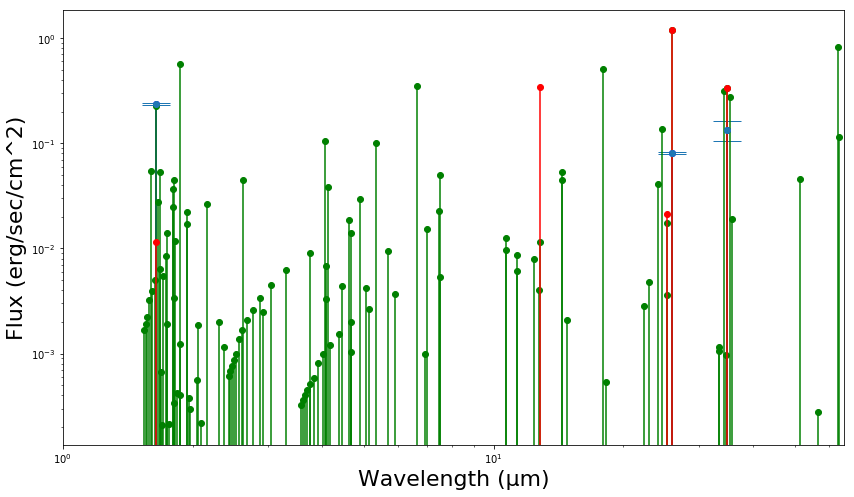

Observed: [0.13517956813188564, 0.08079170023988264, -0.057696317039287445, -0.05157990534031894, 0.23765100831796945]
Simulated: [0.33478294 1.19784317 0.0210506  0.34124688 0.01160696]
Differences: Si -0.19960337686811436 , Fe26 -1.1170514707601173 , S -0.07874691401928745 , Ne -0.3928267833403189 , Fe16 0.22604404413796947


In [370]:
#Trying a specific case
#just need to set ind, knot_num
ind = 2
knot_num = 0
newmid, pointnewmid, modnewmid = initialize(shock_paths[ind])
match_output = allmatch_g(knot_num, modnewmid, pointnewmid)
plotspectrasmall(newmid[match_output[1][0]],knot_num, match_output[1][2])

30
0 0 (1363.4775994278252, [30, ['60', '1000000.0'], 4.0276503518656537e-14])


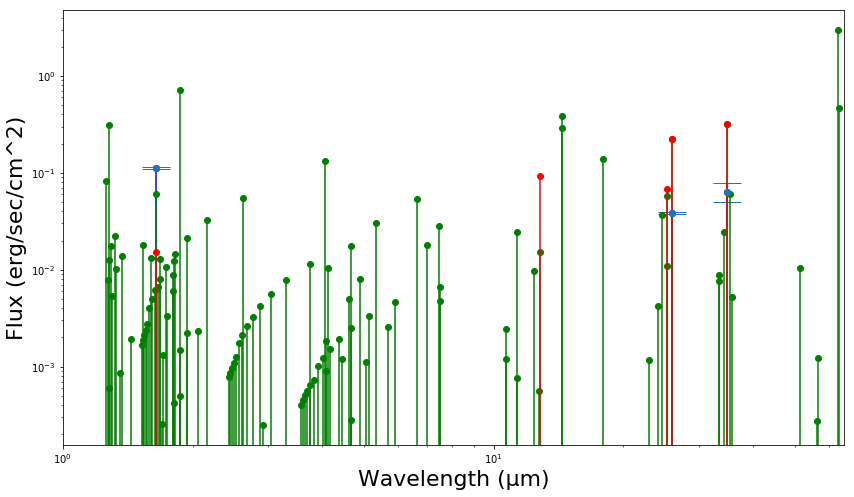

Observed: [0.06397374739468731, 0.03823468216506613, -0.02730478919916402, -0.024410196603558407, 0.11246836917982715]
Simulated: [0.32012279 0.22233515 0.06841347 0.09246319 0.01513025]
Differences: Si -0.2561490416053127 , Fe26 -0.1841004658349339 , S -0.09571825641916404 , Ne -0.11687338513689173 , Fe16 0.09733811753982716
123
1 0 (1084.428512098881, [123, ['40', '1000000.0'], 5.4598602754869054e-14])


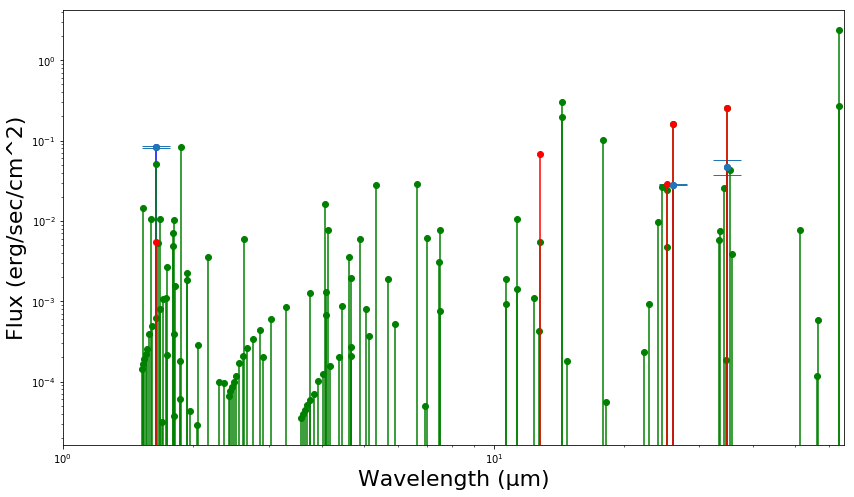

Observed: [0.04719239562983112, 0.02820510476559161, -0.02014230003639115, -0.01800700603655358, 0.08296609140981917]
Simulated: [0.25422397 0.16120337 0.02902422 0.06863603 0.00548667]
Differences: Si -0.20703157877016887 , Fe26 -0.1329982632344084 , S -0.04916652351639114 , Ne -0.08664304043655358 , Fe16 0.07747942164981916
29
2 0 (336.9175890502656, [29, ['60', '794328.234724'], 1.90608602886637e-14])


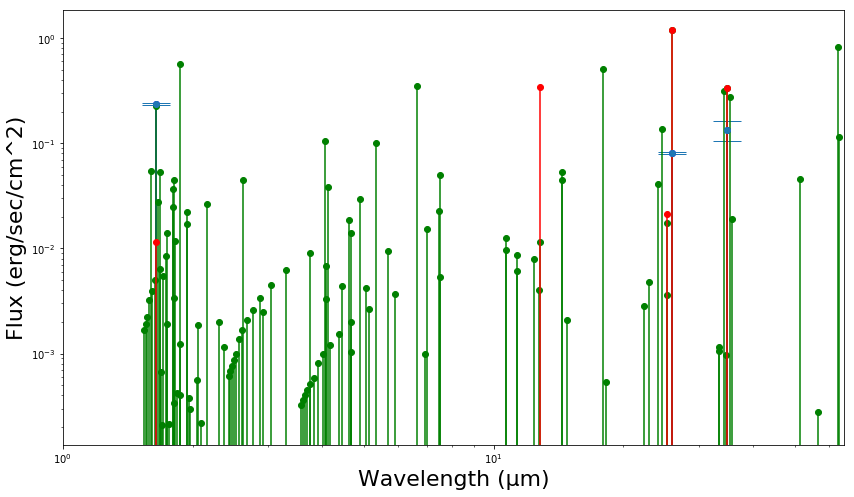

Observed: [0.13517956813188564, 0.08079170023988264, -0.057696317039287445, -0.05157990534031894, 0.23765100831796945]
Simulated: [0.33478294 1.19784317 0.0210506  0.34124688 0.01160696]
Differences: Si -0.19960337686811436 , Fe26 -1.1170514707601173 , S -0.07874691401928745 , Ne -0.3928267833403189 , Fe16 0.22604404413796947
29
3 0 (336.9175890502656, [29, ['60', '794328.234724'], 1.90608602886637e-14])


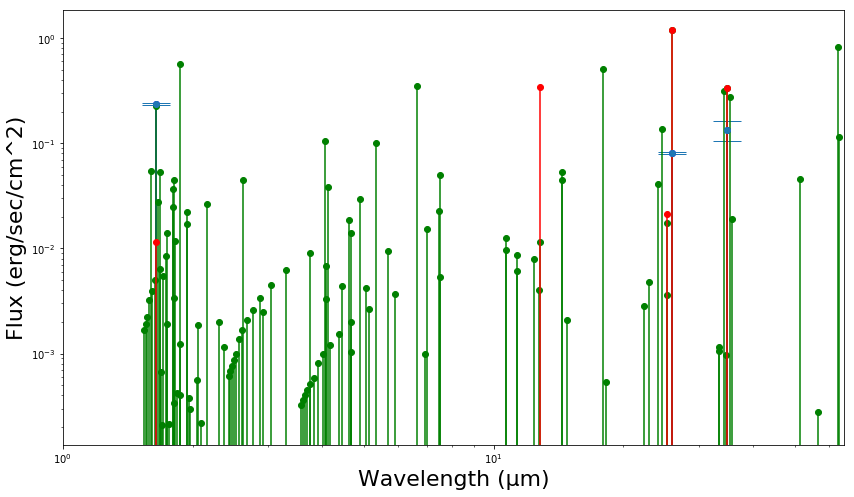

Observed: [0.13517956813188564, 0.08079170023988264, -0.057696317039287445, -0.05157990534031894, 0.23765100831796945]
Simulated: [0.33478294 1.19784317 0.0210506  0.34124688 0.01160696]
Differences: Si -0.19960337686811436 , Fe26 -1.1170514707601173 , S -0.07874691401928745 , Ne -0.3928267833403189 , Fe16 0.22604404413796947


In [371]:
for i in range(len(shock_paths)): #looping through paths to go to each set of spectra 
# for i in [1]: #looping through paths to go to each set of spectra 
    ind = i

    newmid, pointnewmid, modnewmid = initialize(shock_paths[ind])
   
    j = 0
    while j <= 0:
        knot_num = j 
        
#         print(allmatch_g(knot_num, modnewmid, pointnewmid))
                
        try:
            #The inputs are knot number, the list of models, and the list of parameters?
            match_output = allmatch_g(knot_num, modnewmid, pointnewmid)
            print(ind, j, match_output)
            #The outputs are the chi square, the best matching spectrum / its index, the model params for the best match, a scaling factor
            plotspectrasmall(newmid[match_output[1][0]],knot_num, match_output[1][2])
        except: print(ind, j, 'Failure')
        
        
        j += 1

In [281]:
for i in [0,1,7,10]:
    ind = i

    newmid, pointnewmid, modnewmid = initialize(shock_paths[ind])
   
    for j in [6]:
        knot_num = j  #6 works

        try:
            #The inputs are knot number, the list of models, and the list of parameters?
            match_output = allmatchred(knot_num, modnewmid, pointnewmid)
            print(ind, j, match_output) 
            #The outputs are the chi square, the best matching spectrum / its index, the model params for the best match, a scaling factor
        
        plotspectrasmall(newmid[match_output[1][0]],knot_num, match_output[1][2], rawobsflux.columns[knot_num]+'_path'+str(i))
        except: print(ind, j, 'Failure')
        
        
        
        j += 1

SyntaxError: invalid syntax (<ipython-input-281-d910c9dc18f9>, line 15)

In [ ]:
#knot, data?, data?
#print(allmatchred(7,modnewmid, pointnewmid))
#output: ?, index, model params of match, scale factor to match spectra
#chi square should be somewhere...

In [ ]:
#input: data[index from allmatchred], knot number, scale factor
#plotspectrasmall(newmid[154],7,9.983217523428999e-11)
#output: pretty plot!

In [ ]:
#print(allmatch(1,modnewmid, pointnewmid))
#print(allmatch(1,modnewmid2, pointnewmid2))
#print(allmatch(1,modnewtop, pointnewtop))
#print(allmatch(1,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatch(2,modnewmid, pointnewmid))
#print(allmatch(2,modnewmid2, pointnewmid2))
#print(allmatch(2,modnewtop, pointnewtop))
#print(allmatch(2,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(3,modnewmid, pointnewmid))
#print(allmatchred(3,modnewmid2, pointnewmid2))
#print(allmatchred(3,modnewtop, pointnewtop))
#print(allmatchred(3,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(4,modnewmid, pointnewmid))
#print(allmatchred(4,modnewmid2, pointnewmid2))
#print(allmatchred(4,modnewtop, pointnewtop))
#print(allmatchred(4,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(5,modnewmid, pointnewmid))
#print(allmatchred(5,modnewmid2, pointnewmid2))
#print(allmatchred(5,modnewtop, pointnewtop))
#print(allmatchred(5,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(6,modnewmid, pointnewmid))
#print(allmatchred(6,modnewmid2, pointnewmid2))
#print(allmatchred(6,modnewtop, pointnewtop))
#print(allmatchred(6,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(7,modnewmid, pointnewmid))
#print(allmatchred(7,modnewmid2, pointnewmid2))
#print(allmatchred(7,modnewtop, pointnewtop))
#print(allmatchred(7,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(8,modnewmid, pointnewmid))
#print(allmatchred(8,modnewmid2, pointnewmid2))
#print(allmatchred(8,modnewtop, pointnewtop))
#print(allmatchred(8,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(9,modnewmid, pointnewmid))
#print(allmatchred(9,modnewmid2, pointnewmid2))
#print(allmatchred(9,modnewtop, pointnewtop))
#print(allmatchred(9,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(10,modnewmid, pointnewmid))
#print(allmatchred(10,modnewmid2, pointnewmid2))
#print(allmatchred(10,modnewtop, pointnewtop))
#print(allmatchred(10,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(11,modnewmid, pointnewmid))
#print(allmatchred(11,modnewmid2, pointnewmid2))
#print(allmatchred(11,modnewtop, pointnewtop))
#print(allmatchred(11,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(12,modnewmid, pointnewmid))
#print(allmatchred(12,modnewmid2, pointnewmid2))
#print(allmatchred(12,modnewtop, pointnewtop))
#print(allmatchred(12,modnewtop2, pointnewtop2))

In [ ]:
#print(allmatchred(13,modnewmid, pointnewmid))  # no match
#print(allmatchred(13,modnewmid2, pointnewmid2))
#print(allmatchred(13,modnewtop, pointnewtop))
#print(allmatchred(13,modnewtop2, pointnewtop2))

In [ ]:
# print(allmatchred(14,modnewmid, pointnewmid))
# print(allmatchred(14,modnewmid2, pointnewmid2))
# print(allmatchred(14,modnewtop, pointnewtop))
# print(allmatchred(14,modnewtop2, pointnewtop2))

In [ ]:
# print(allmatchred(15,modnewmid, pointnewmid))
# print(allmatchred(15,modnewmid2, pointnewmid2))
# print(allmatchred(15,modnewtop, pointnewtop))
# print(allmatchred(15,modnewtop2, pointnewtop2))

In [ ]:
# print(allmatchred(16,modnewmid, pointnewmid))
# print(allmatchred(16,modnewmid2, pointnewmid2))
# print(allmatchred(16,modnewtop, pointnewtop))
# print(allmatchred(16,modnewtop2, pointnewtop2))

In [ ]:
# print(allmatchred(17,modnewmid, pointnewmid))
# print(allmatchred(17,modnewmid2, pointnewmid2))
# print(allmatchred(17,modnewtop, pointnewtop))
# print(allmatchred(17,modnewtop2, pointnewtop2))

In [ ]:
# print(allmatchred(18,modnewmid, pointnewmid))
# print(allmatchred(18,modnewmid2, pointnewmid2))
# print(allmatchred(18,modnewtop, pointnewtop))
# print(allmatchred(18,modnewtop2, pointnewtop2))

In [ ]:
# print(allmatchred(19,modnewmid, pointnewmid))
# print(allmatchred(19,modnewmid2, pointnewmid2))
# print(allmatchred(19,modnewtop, pointnewtop))
# print(allmatchred(19,modnewtop2, pointnewtop2))

In [ ]:
# print(allmatchred(20,modnewmid, pointnewmid))
# print(allmatchred(20,modnewmid2, pointnewmid2))
# print(allmatchred(20,modnewtop, pointnewtop))
# print(allmatchred(20,modnewtop2, pointnewtop2))

In [ ]:
def hydrogen(file):
    modlist = []
    t = 0
    while t < len(file):
        lst = file[t]
        listup = initial(lst)

        muep = [item[0] for item in listup]
        muwl = [item[1] for item in listup]
        
        for i in (i for i,x in enumerate(muwl) if x == 0.6562819000000001):  # H alpha
            ua = muep[i]

        for i in (i for i,x in enumerate(muwl) if x == 1.281807):  # Paschen Beta
            ub = muep[i]
        
        ratio = ua/ub
        modlist.append(ratio)
        t = t + 1
    return(modlist)
            

In [ ]:
test = hydrogen(newmid)

In [ ]:
more = hydrogen(mega)

In [ ]:
print(more)